
# Predicting Telco Customers Churn
![](https://insidetelecom.com/wp-content/uploads/2020/11/Telecom-operators-and-reducing-customer-churn.jpg)

By [ Waleed on LinkedIn](https://www.linkedin.com/in/waleedabdulla/)

A major issue facing the telecommunications (Telco) sector is customer attrition. It is described as the loss of clients who switch Telco providers. Telco operators can employ business marketing practices to such turnover clients to retain and grow the customer base if customer churn can be forecast in advance, such as "is this customer going to leave us within the next X months?" Particularly, considering the millions of Telco customers, even a 1% decrease in churn will result in a huge rise in earnings.

### Problem Statement

The objective of this project is to predict customers that are about to churn in order to catch them with a discount or attractive offers. It is desirable to develop a machine learning model that can predict customers who will leave the company. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.


***telecom_customer_churn_joined.csv*** data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers with 37 variables in the third quarter. Each row represents a customer, each variable contains the customer's attributes. It shows which clients have canceled their service shows, stayed, or joined up.


The following table shows the data types of the variables with 17 categorical and 3 numerical data type.


| Variable         | Meaning |
| ---------------- | ----------------------------------------------- |
|CustomerID|ID that identifies each customer
|Gender|The customer’s gender: Male, Female
|Age|The customer’s current age, in years, at the time the fiscal quarter ended (Q2 2022)
|Married|Indicates if the customer is married: Yes, No
|Number of Dependents|Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)
|City|The city of the customer’s primary residence in California
|PostalCode| The PostalCode of the customer’s primary residenc
|Latitude| The latitude of the customer’s primary residence
|Longitude| The longitude of the customer’s primary residence
|Number of Referrals| Indicates the number of times the customer has referred a friend or family member to this company to date
|Tenure in Months|Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above
|Offer|Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E
|Phone Service|Indicates if the customer subscribes to home phone service with the company: Yes, No
|Avg Monthly Long Distance Charges|Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above (if the customer is not subscribed to home phone service, this will be 0)
|Multiple Lines|Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No (if the customer is not subscribed to home phone service, this will be No)
|Internet Service|Indicates if the customer subscribes to Internet service with the company: Yes, No
|Internet Type|Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)
|Avg Monthly GB Download|Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above (if the customer is not subscribed to internet service, this will be 0)
|Online Security|Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Online Backup|Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Device Protection Plan|Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Premium Tech Support|Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Streaming TV|Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Streaming Movies|Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Streaming Music|Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Unlimited Data|Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No (if the customer is not subscribed to internet service, this will be No)
|Contract|Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year
|Paperless Billing|Indicates if the customer has chosen paperless billing: Yes, No
|Payment Method|Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
|Monthly Charge|Indicates the customer’s current total monthly charge for all their services from the company
|Total Charges|Indicates the customer’s total charges, calculated to the end of the quarter specified above
|Total Refunds|Indicates the customer’s total refunds, calculated to the end of the quarter specified above
|Total Extra Data Charges|Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above
|Total Long Distance Charges|Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above
|Total Revenue|Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)
|Customer Status|Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
|Churn Category|A high-level category for the customer’s reason for churning, which is asked when they leave the company: Attitude, Competitor, Dissatisfaction, Other, Price (directly related to Churn Reason)
|Churn Reason|A customer’s specific reason for leaving the company, which is asked when they leave the company (directly related to Churn Category)
|Population|A current population estimate for the entire PostalCode area


## Importing Required Libraries

In [1]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import normaltest
import scipy.stats

import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Data Extraction and Preparation

In [2]:
df = pd.read_csv('../data/telecom_customer_churn_joined.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,34.827662,-118.999073,2,9,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,0003-MKNFE,Male,46,No,0,Glendale,34.162515,-118.203869,0,9,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,33.645672,-117.922613,0,4,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,0011-IGKFF,Male,78,Yes,0,Martinez,38.014457,-122.115432,1,13,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,34.227846,-119.079903,3,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853


In [3]:
data = df.drop(['Customer ID','Churn Category','Churn Reason'], axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Latitude                           7043 non-null   float64
 6   Longitude                          7043 non-null   float64
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure in Months                   7043 non-null   int64  
 9   Offer                              7043 non-null   object 
 10  Phone Service                      7043 non-null   object 
 11  Avg Monthly Long Distance Charges  6361 non-null   float

In [5]:
data.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [6]:
data[data['Internet Type'].isna()][['Internet Type','Avg Monthly GB Download','Online Security',
                                    'Online Backup','Device Protection Plan','Premium Tech Support',
                                    'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']]

,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data[data['Avg Monthly Long Distance Charges'].isna()][['Avg Monthly Long Distance Charges','Multiple Lines']]

,Avg Monthly Long Distance Charges,Multiple Lines
10,NaN,NaN
14,NaN,NaN
16,NaN,NaN
19,NaN,NaN
25,NaN,NaN
...,...,...
6979,NaN,NaN
6980,NaN,NaN
6996,NaN,NaN
7016,NaN,NaN


In [8]:
data[data['Internet Type'].isna() | data['Multiple Lines'].isna()].head(3).T

,10,14,16
Gender,Male,Female,Female
Age,47,39,52
Married,No,No,Yes
Number of Dependents,0,0,1
City,Rancho Santa Fe,Los Olivos,Point Reyes Station
Latitude,32.99356,34.70434,38.060264
Longitude,-117.207121,-120.02609,-122.830646
Number of Referrals,0,0,0
Tenure in Months,54,56,34
Offer,None,None,None


In [9]:
(len(data) - len(data[data['Internet Type'].isna() | data['Multiple Lines'].isna()]))/len(data)

0.686497231293483

In [10]:
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 7041
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4835 non-null   object 
 1   Age                                4835 non-null   int64  
 2   Married                            4835 non-null   object 
 3   Number of Dependents               4835 non-null   int64  
 4   City                               4835 non-null   object 
 5   Latitude                           4835 non-null   float64
 6   Longitude                          4835 non-null   float64
 7   Number of Referrals                4835 non-null   int64  
 8   Tenure in Months                   4835 non-null   int64  
 9   Offer                              4835 non-null   object 
 10  Phone Service                      4835 non-null   object 
 11  Avg Monthly Long Distance Charges  4835 non-null   float

In [11]:
# interesting! "TotalCharges" features is missing a value...let me fill
# data.TotalCharges = data.TotalCharges.fillna( data.TotalCharges.median()) 

In [12]:
# I will change the data type for Senior Cetizen to categorical for plotting purposes
# data.SeniorCitizen = data.SeniorCitizen.astype('O')

In [13]:
# cool!

### EDA
In this section, I will check the distribution of the numeric features, the frequency of the categorical features. I will also check frequency of the target to see the balance of the data

In [14]:
# selecting numeric features
numeric_features = data.select_dtypes([int,float]).columns.tolist()

In [15]:
# selecting categorical features
categorical_features = [col for col in data.select_dtypes('O').columns if col != 'Customer Status']

### Examining the Distribution of Numeric Features

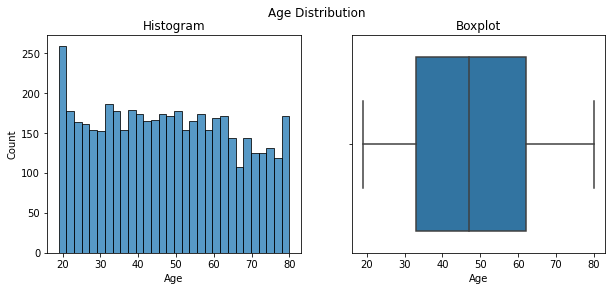

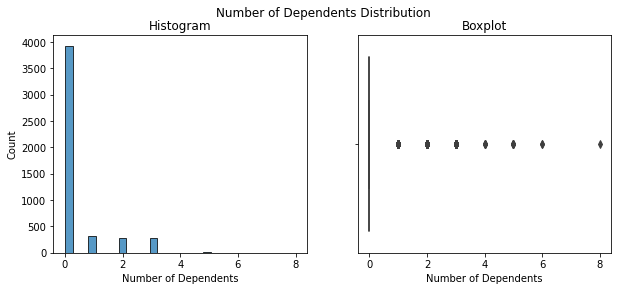

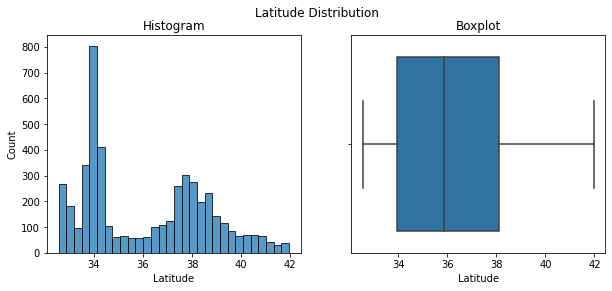

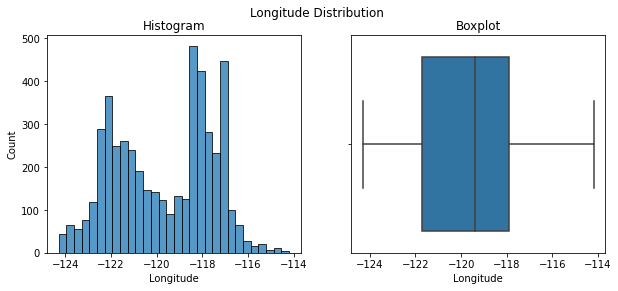

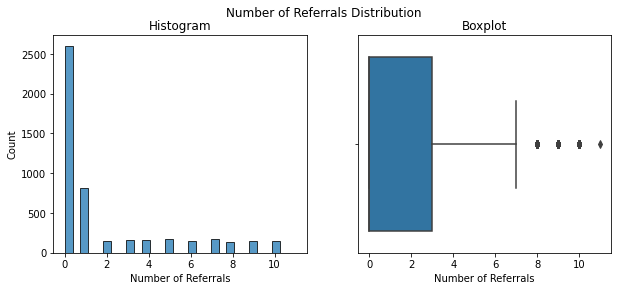

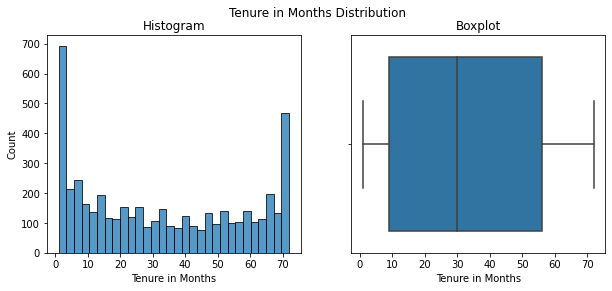

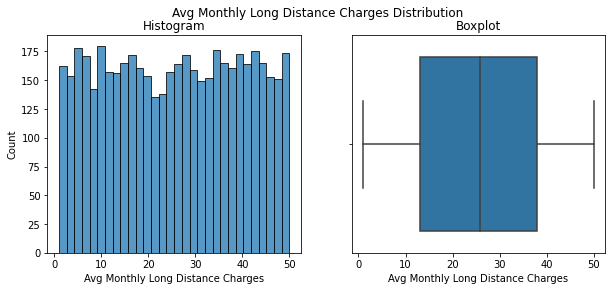

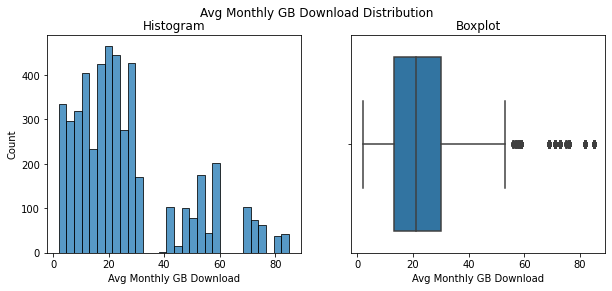

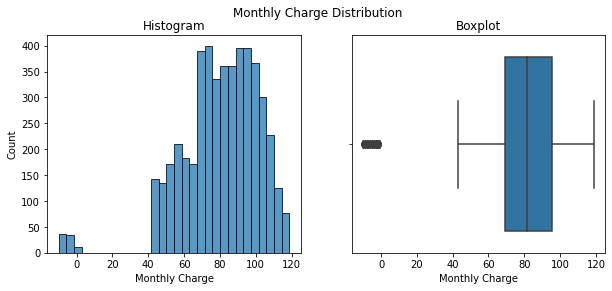

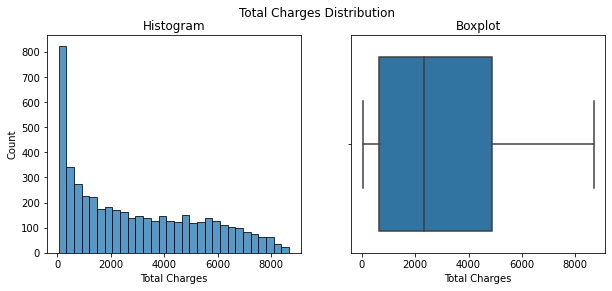

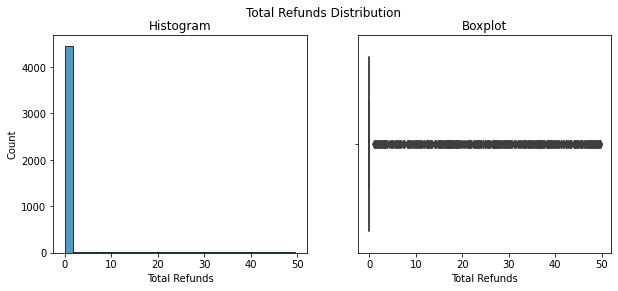

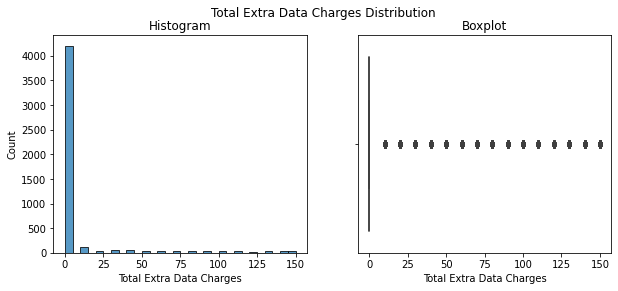

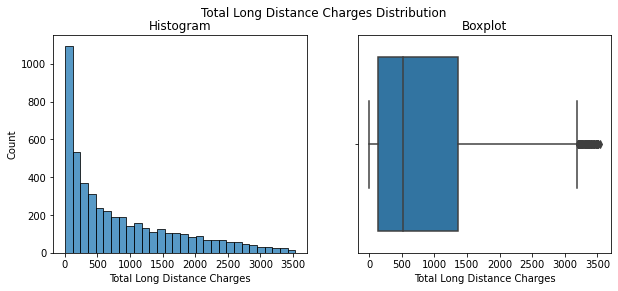

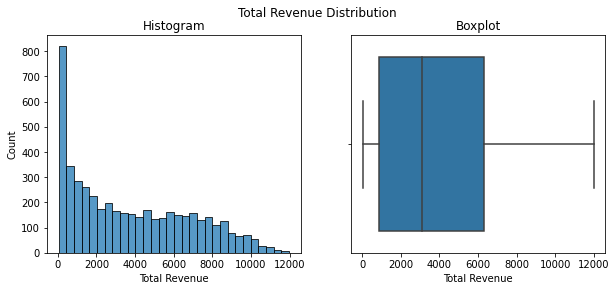

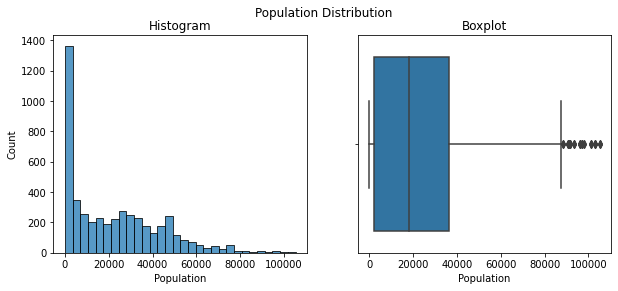

In [16]:
for col in numeric_features:
    plt.figure(figsize=(10,4))
    plt.suptitle(f'{col} Distribution')
    
    plt.subplot(1,2,1)
    sns.histplot(data=data, x = col, bins=30)
    plt.title('Histogram')
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x = col)
    plt.title('Boxplot')
    
    plt.show() 

### Examining the Frequency of the Categorical Features

Male      2425
Female    2410
Name: Gender, dtype: int64


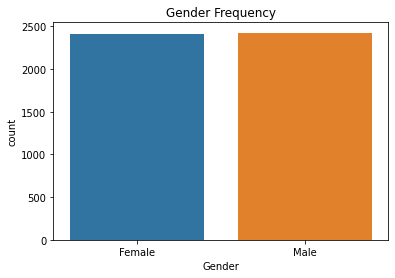

No     2482
Yes    2353
Name: Married, dtype: int64


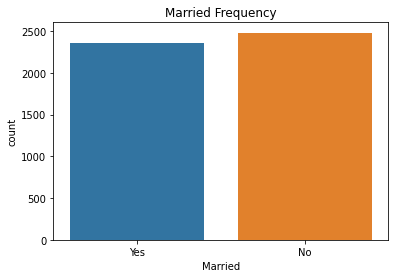

None       2641
Offer B     585
Offer E     544
Offer D     392
Offer A     382
Offer C     291
Name: Offer, dtype: int64


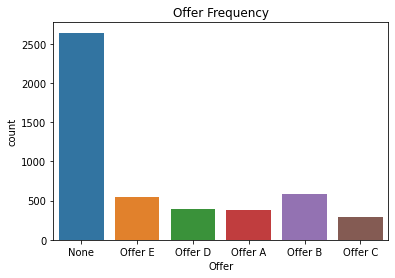

Yes    4835
Name: Phone Service, dtype: int64


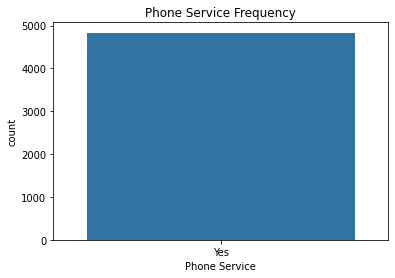

Yes    2629
No     2206
Name: Multiple Lines, dtype: int64


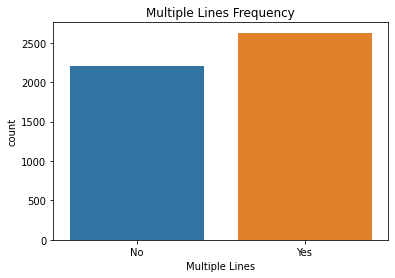

Yes    4835
Name: Internet Service, dtype: int64


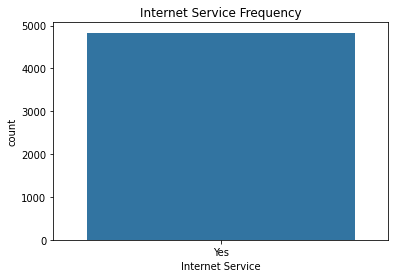

Fiber Optic    3035
DSL            1199
Cable           601
Name: Internet Type, dtype: int64


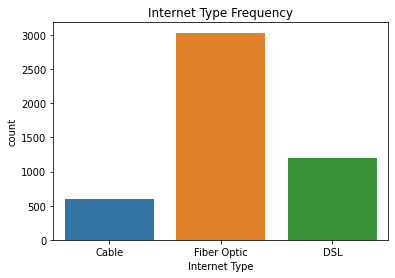

No     3099
Yes    1736
Name: Online Security, dtype: int64


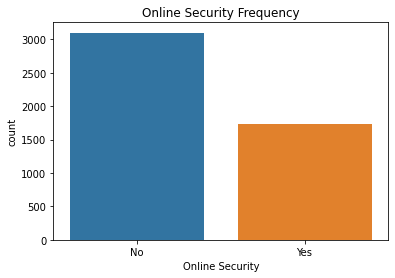

No     2693
Yes    2142
Name: Online Backup, dtype: int64


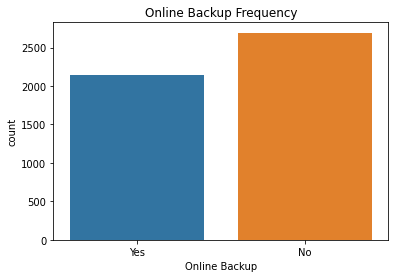

No     2718
Yes    2117
Name: Device Protection Plan, dtype: int64


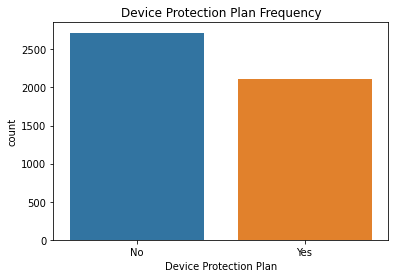

No     3080
Yes    1755
Name: Premium Tech Support, dtype: int64


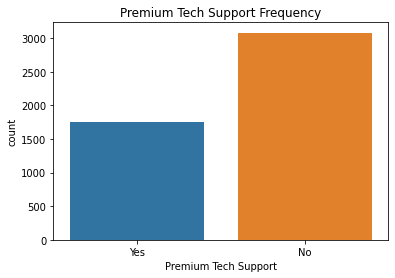

Yes    2422
No     2413
Name: Streaming TV, dtype: int64


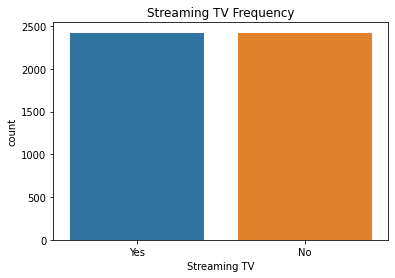

Yes    2434
No     2401
Name: Streaming Movies, dtype: int64


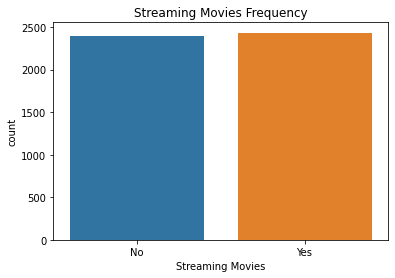

No     2627
Yes    2208
Name: Streaming Music, dtype: int64


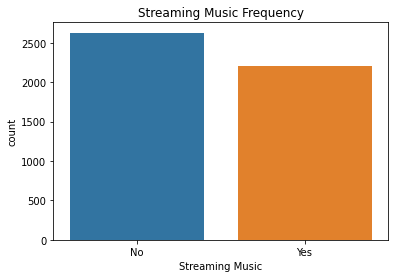

Yes    4166
No      669
Name: Unlimited Data, dtype: int64


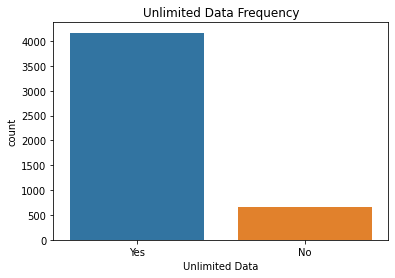

Month-to-Month    2740
Two Year          1061
One Year          1034
Name: Contract, dtype: int64


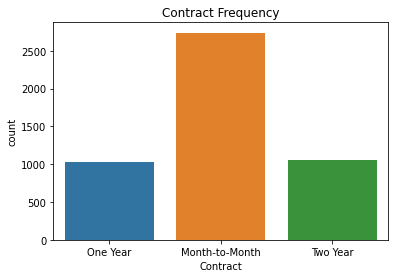

Yes    3338
No     1497
Name: Paperless Billing, dtype: int64


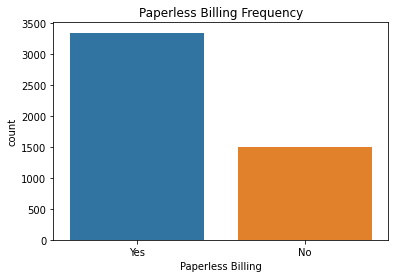

Bank Withdrawal    3086
Credit Card        1558
Mailed Check        191
Name: Payment Method, dtype: int64


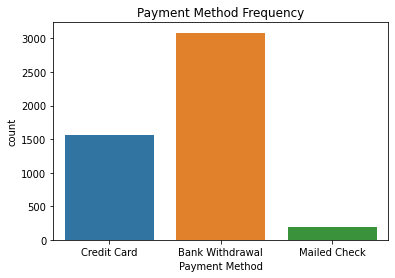

In [17]:
for col in categorical_features:
    if col == 'City':
        continue
    else:
        print(data[col].value_counts())
        sns.countplot(x = data[col])
        plt.title(f'{col} Frequency')
        if col == "PaymentMethod":
            plt.xticks(rotation=45)
        plt.show()

It can be seen from the plots that "Phone Service" and "Internet Service" have only 1 distinct value for each. So, it won't add much for the analysis. Therefore, those features can be droped.

In [18]:
categorical_features.remove('Phone Service')
categorical_features.remove('Internet Service')


### Examining the Frequency of the Target

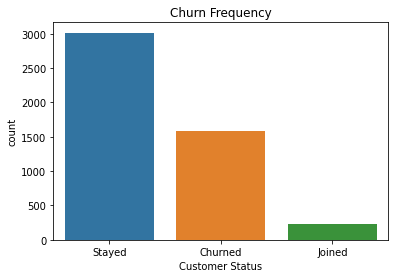

In [19]:
# check the distribution of the target
sns.countplot(x = data['Customer Status'])
plt.title('Churn Frequency')
plt.show()

This is obviously imbalanced data.

Since the objective of this project is to predict which customer is about to churn or not, then no need for the "joined" value.
Therefore, I will remove the records associated with "joined" value.

In [20]:
data = data[data['Customer Status'] != 'Joined']

### Examining the Distribution of the Numeric Features by Target

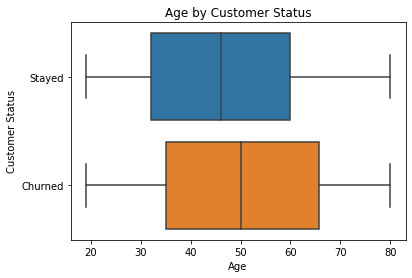

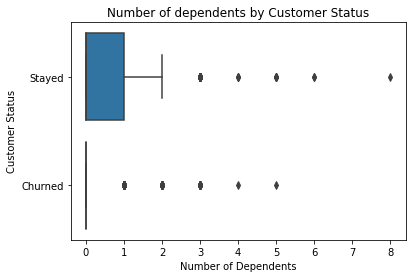

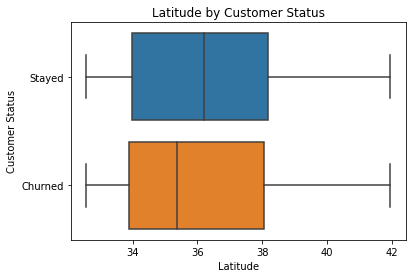

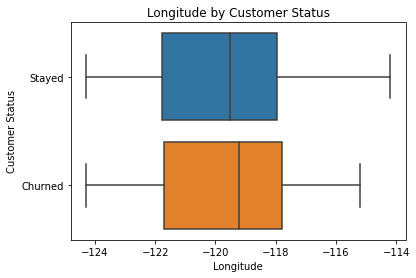

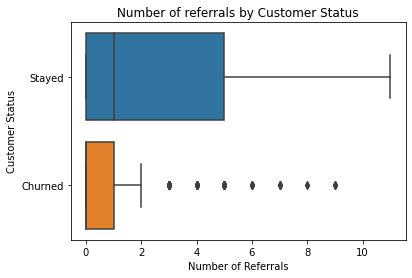

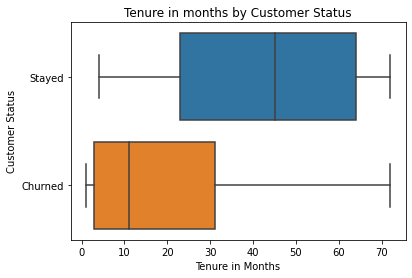

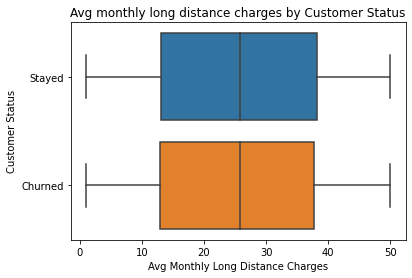

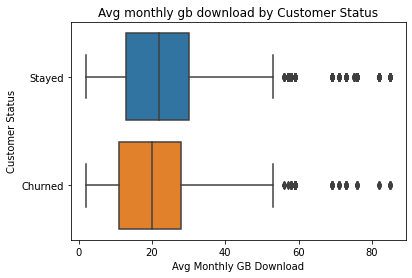

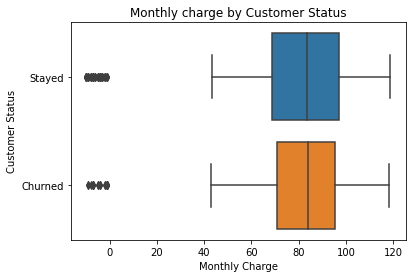

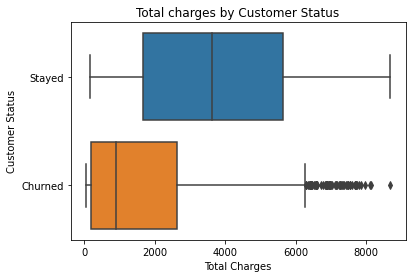

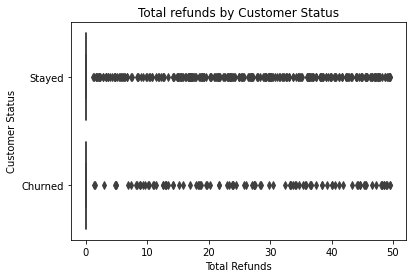

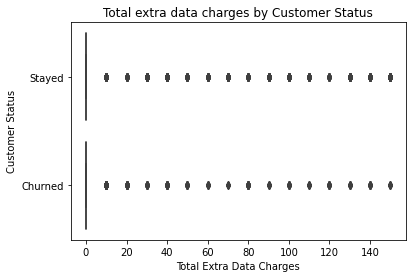

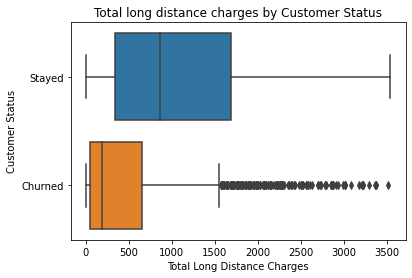

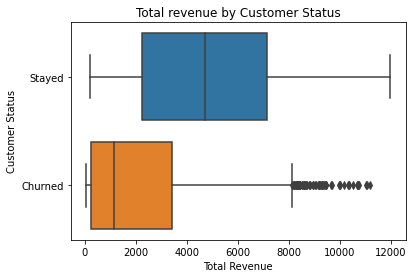

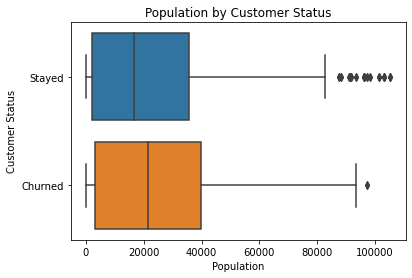

In [21]:
for col in numeric_features:
    sns.boxplot(x = col, y = 'Customer Status',data = data)
    plt.title(f'{col.capitalize()} by Customer Status')
    plt.show()

### Examining the Frequency of the Categorical Features by Target

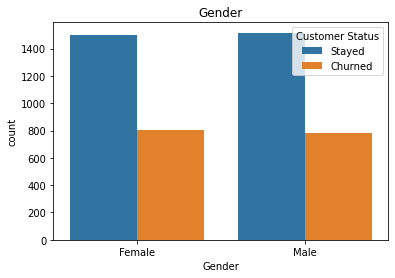

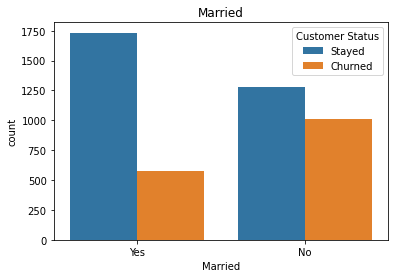

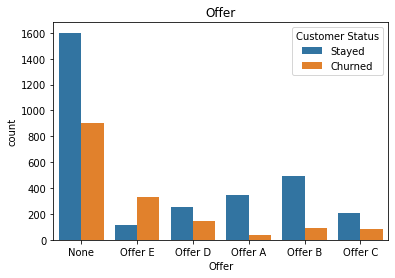

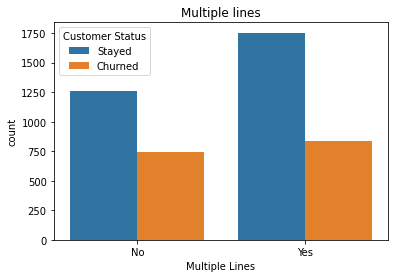

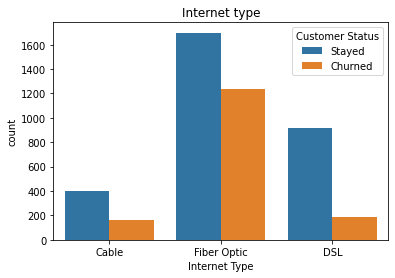

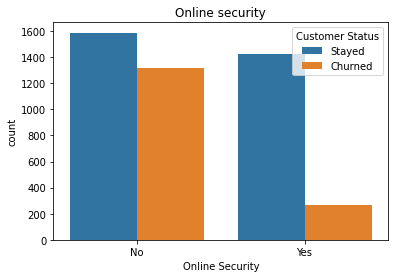

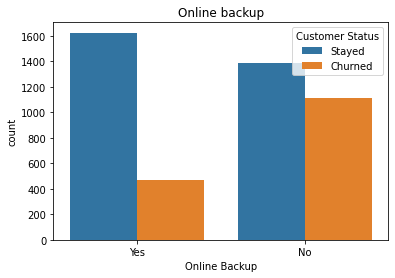

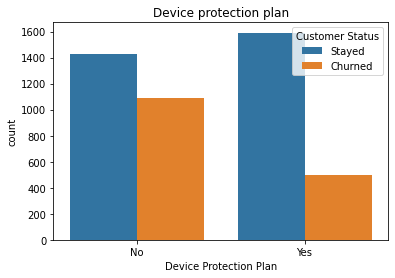

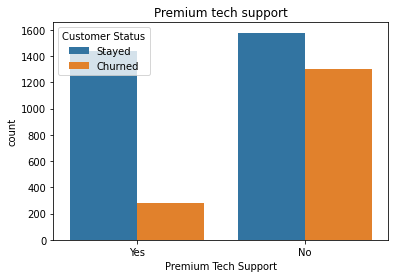

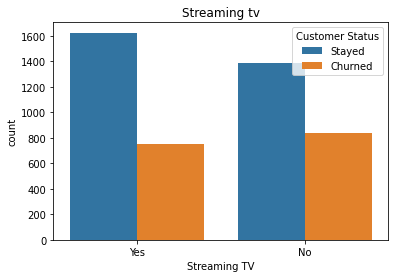

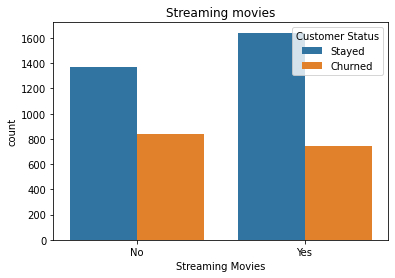

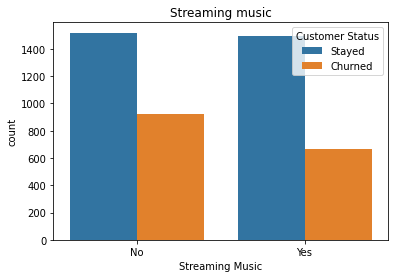

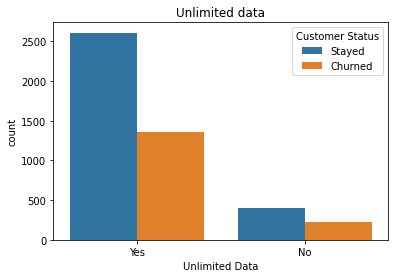

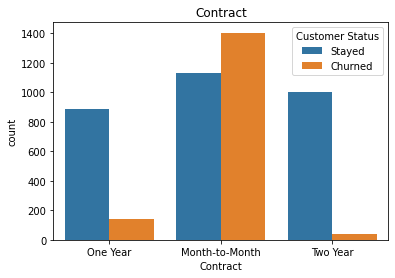

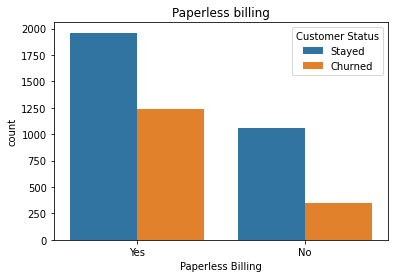

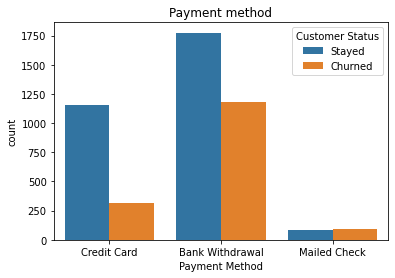

In [22]:
for col in categorical_features:
    if col == 'City':
        continue
    if col == "PaymentMethod":
        plt.figure(figsize=(10,4))
    plt.title(f"{col.capitalize()}")
    sns.countplot(x = data[col], hue = 'Customer Status',data=data)
    plt.show()

__Checking the Outliers__

In [23]:
for col in numeric_features:

    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_lim = q1 - 1.5*iqr
    uppler_lim = q3 + 1.5*iqr
    
    outliers = sum((data[col] < lower_lim) | (data[col]  > uppler_lim))
    
    print(f'{col}')
    print(f'outliers = {outliers} \n')

Age
outliers = 0 

Number of Dependents
outliers = 872 

Latitude
outliers = 0 

Longitude
outliers = 0 

Number of Referrals
outliers = 415 

Tenure in Months
outliers = 0 

Avg Monthly Long Distance Charges
outliers = 0 

Avg Monthly GB Download
outliers = 540 

Monthly Charge
outliers = 79 

Total Charges
outliers = 0 

Total Refunds
outliers = 376 

Total Extra Data Charges
outliers = 591 

Total Long Distance Charges
outliers = 46 

Total Revenue
outliers = 0 

Population
outliers = 36 



## Feature Selection
In this section, I will select the features for modeling based on Hypothesis testing. I will use Hypothesis Testing to determine whether a feature has a significant relationship with the target or no. Since the target is of a categorical data type with 2 lables, I will use independent t_test "scipy.stats.ttest_ind" Chi2 test "scipy.stats.chi2_contingency" to determine its relationship with the numeric and categorical features respectively.

__Hypothesis Testing__

Examining the significance of the relationships between the target and the numeric_features

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in numerical columns scores between Churn and Non-churn customers")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in numerical columns scores between hurn and Non-churn customers")

In [24]:
sig_numeric_features = []
for col in numeric_features:
    # conduct levene test
    _, p_value_levene = scipy.stats.levene(data[data['Customer Status'] == 'Churned'][col],
                                           data[data['Customer Status'] == 'Stayed'][col], 
                                           center = 'mean')
    
    if p_value_levene >= 0.05:
        equal_var = True
    else:
        equal_var = False
    # conduct independent t-test
    _, p_value_ttset=  scipy.stats.ttest_ind(data[data['Customer Status'] == 'Churned'][col],
                                              data[data['Customer Status'] == 'Stayed'][col], 
                                              equal_var = equal_var)
    
    if p_value_ttset >= 0.05:
        print(f'{col}')
        print(f'P_value: {p_value_ttset}')
        print(f'Decision: {col} has no significant relationship of the target')
        print('\n')
    else:
        print(f'{col}')
        print(f'P_value: {p_value_ttset}')
        print(f'Decision: {col} has a significant relationship of the target')
        print('\n')
        sig_numeric_features.append(col)  

Age
P_value: 1.8086338964929505e-10
Decision: Age has a significant relationship of the target


Number of Dependents
P_value: 2.617976796858298e-88
Decision: Number of Dependents has a significant relationship of the target


Latitude
P_value: 0.010031998171008397
Decision: Latitude has a significant relationship of the target


Longitude
P_value: 0.287344980382144
Decision: Longitude has no significant relationship of the target


Number of Referrals
P_value: 2.7255140318443905e-203
Decision: Number of Referrals has a significant relationship of the target


Tenure in Months
P_value: 3.59122126278058e-260
Decision: Tenure in Months has a significant relationship of the target


Avg Monthly Long Distance Charges
P_value: 0.8164699187474204
Decision: Avg Monthly Long Distance Charges has no significant relationship of the target


Avg Monthly GB Download
P_value: 1.8450257166869413e-12
Decision: Avg Monthly GB Download has a significant relationship of the target


Monthly Charge
P_val

__Hypothesis Testing__

Examining the significance of the relationships between the target and the categorical_features

State the hypothesis:

-   $H_0:$ The proportion of customers who are Churned is independent of the categorical feature
-   $H_1:$ The proportion of customers who are Churned is associated with the categorical feature

In [25]:
sig_categorical_features = []
for col in categorical_features:
    if col == 'City':
        continue
    else:
        cont_table = pd.crosstab(data['Customer Status'], data[col])
        _, p_value, __, ___ = scipy.stats.chi2_contingency(cont_table, correction = True)

        if p_value >= 0.05:
            print(col)
            print(f'P_value: {p_value}')
            print(f'Decision: There is no siginificant relationship between the churned customers and {col} ')
            print('\n')
        else:
            print(col)
            print(f'P_value: {p_value}')
            print(f'Decision: There is a siginificant relationship between the churned customers and {col} ')
            print('\n')
            sig_categorical_features.append(col)

Gender
P_value: 0.5773309455418278
Decision: There is no siginificant relationship between the churned customers and Gender 


Married
P_value: 1.7595992359975243e-41
Decision: There is a siginificant relationship between the churned customers and Married 


Offer
P_value: 3.4800784155464226e-111
Decision: There is a siginificant relationship between the churned customers and Offer 


Multiple Lines
P_value: 0.0008517874055710874
Decision: There is a siginificant relationship between the churned customers and Multiple Lines 


Internet Type
P_value: 6.110571148067685e-51
Decision: There is a siginificant relationship between the churned customers and Internet Type 


Online Security
P_value: 1.8232491769755517e-92
Decision: There is a siginificant relationship between the churned customers and Online Security 


Online Backup
P_value: 8.177332687134967e-55
Decision: There is a siginificant relationship between the churned customers and Online Backup 


Device Protection Plan
P_value: 7

In [26]:
sig_features = sig_numeric_features + sig_categorical_features

## Features Engineering

In this section, I will do 3 things:

1- Split the data to features and target.

2- Encode the target: I will encode the target to 1 and 0 corresponding to "Yes" and "No".

3- Encode categorical features: I will one-hot-encode the categorical features

4- Normalize numeric features: I plan to use Support Vector Classifier and KNearestneighbors models, therefore, I have to normalize the data.



I will not split the data to train and test datasets because I plan to use cross_val_score class to evaluate the model


The first thing I will do, though, is to return "SeniorCitizen" to int data-type, remove it from the categorical features since it is a binary features.

### Splitting the Data to X (features) and y (target)

In [27]:
X = data[sig_features]
y = data['Customer Status'].map({'Churned':1,'Stayed':0})

In [28]:
X.head()

,Age,Number of Dependents,Latitude,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method
0,37,0,34.827662,2,9,16.0,593.30,0.00,0,381.51,...,No,Yes,No,Yes,Yes,No,No,One Year,Yes,Credit Card
1,46,0,34.162515,0,9,10.0,542.40,38.33,10,96.21,...,No,No,No,No,No,Yes,Yes,Month-to-Month,No,Credit Card
2,50,0,33.645672,0,4,30.0,280.85,0.00,0,134.60,...,No,No,Yes,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal
3,78,0,38.014457,1,13,4.0,1237.85,0.00,0,361.66,...,No,Yes,Yes,No,Yes,Yes,No,Month-to-Month,Yes,Bank Withdrawal
4,75,0,34.227846,3,3,11.0,267.40,0.00,0,22.14,...,No,No,No,Yes,Yes,No,No,Month-to-Month,Yes,Credit Card


In [29]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Customer Status, dtype: int64

### Encoding the Categorical Feautres

In [30]:
for col in sig_categorical_features:
    print(f"{col}")
    print(data[f"{col}"].unique())
    print('\n')

Married
['Yes' 'No']


Offer
['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']


Multiple Lines
['No' 'Yes']


Internet Type
['Cable' 'Fiber Optic' 'DSL']


Online Security
['No' 'Yes']


Online Backup
['Yes' 'No']


Device Protection Plan
['No' 'Yes']


Premium Tech Support
['Yes' 'No']


Streaming TV
['Yes' 'No']


Streaming Movies
['No' 'Yes']


Streaming Music
['No' 'Yes']


Contract
['One Year' 'Month-to-Month' 'Two Year']


Paperless Billing
['Yes' 'No']


Payment Method
['Credit Card' 'Bank Withdrawal' 'Mailed Check']




In [31]:
for col in sig_categorical_features:
    col_df = pd.get_dummies(X[col], prefix=col, drop_first= True)
    X = pd.concat([X,col_df],axis=1)
    X.drop(col,axis=1,inplace=True)

### Normalizing the Numeric Features

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
min_max_scaler = MinMaxScaler()

In [34]:
for col in sig_numeric_features:
    X[col] = min_max_scaler.fit_transform(X[[col]])

In [35]:
X.head()

,Age,Number of Dependents,Latitude,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.295082,0.0,0.241523,0.181818,0.112676,0.168675,0.063690,0.00000,0.000000,0.107588,...,0,1,1,0,0,1,0,1,1,0
1,0.442623,0.0,0.170810,0.000000,0.112676,0.096386,0.057800,0.77325,0.066667,0.026893,...,0,0,0,1,1,0,0,0,1,0
2,0.508197,0.0,0.115863,0.000000,0.042254,0.337349,0.027534,0.00000,0.000000,0.037751,...,1,0,0,0,0,0,0,1,0,0
3,0.967213,0.0,0.580316,0.090909,0.169014,0.024096,0.138274,0.00000,0.000000,0.101974,...,1,0,1,1,0,0,0,1,0,0
4,0.918033,0.0,0.177755,0.272727,0.028169,0.108434,0.025978,0.00000,0.000000,0.005943,...,0,1,1,0,0,0,0,1,1,0


## Model Selection and Evaluation

![](https://scikit-learn.org/stable/_static/ml_map.png)

### Strategy
__Selecting an Estimator__
- I will take the recommendation of sklearn documentation with some modification.
- I will test several baseline models initially. 
- Next, I will try several ensemble classifiers.
- Next, I will compares the  different baseline models using f1 scores and select the model with largest score.
- Finally, I will optimize and tune the selected model using GridSerachCV

__Data Spliting__\
Since I plan to use cross-val-score, and the data is unbalanced, I will use StratifiedKFold class with n_split = 10.

__Selecting Evaluation Scoring Metrics__\
I will select f1  and recall scores to evaluate the performance of the models.

Why not accuaracy? Because accuracy is usually not the best metrics to measure the peformance of classification model on a binary dataset. Moreover, this dataset is imbalanced which emphasize avioding accuracy metric for evaluation.

Why not roc_auc_score? Because this dataset is imbalanced hence not very suitable for roc_auc_score.


In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

In [37]:
# estimators for StackingClassifier
# estimators = [('xgbc',XGBClassifier(learning_rate=0.01, random_state=2)),('svr', AdaBoostClassifier(random_state=2))]
# final_estimator = LogisticRegression()
# ,('StackingClassifier',StackingClassifier(estimators=estimators, final_estimator=final_estimator))


# list of model names and models
models = [
    ('LogisticRegression',LogisticRegression(random_state = 2)),
    ('LinearSVC',LinearSVC(random_state=2)),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('SVC',SVC(random_state = 2)),
    ('RandomForestClassifier',RandomForestClassifier(random_state=2)),
    ('BaggingClassifier',BaggingClassifier(random_state=2)),
    ('AdaBoostClassifier',AdaBoostClassifier(random_state=2)),
    ('GradientBoostingClassifier',GradientBoostingClassifier(random_state = 2)),
    ('XGBClassifier',XGBClassifier(learning_rate=0.01))]

In [38]:
models_names = [model_name for model_name,model in models]


In [39]:
# dictionary for the scoring
results = {'models':models_names,
           'accuracy_score':[],
           'f1_score' : [],
           'recall_score':[]}

In [40]:
for model_name, model in models:
    clf = model
    
    skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X,y)
    model_accuracy_score =cross_val_score(clf, X,y,cv=skf, scoring='accuracy')
    
    skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X,y)
    model_f1_score = cross_val_score(clf, X,y,cv=skf, scoring='f1')


    skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X,y)
    model_recall_score =cross_val_score(clf, X,y,cv=skf, scoring='recall')

    
    print(f'Model: {model_name}')
    print(f'accuracy_score = {round(model_accuracy_score.mean(),2)}')
    print(f'f1_score = {round(model_f1_score.mean(),2)}')
    print(f'recall_score = {round(model_recall_score.mean(),2)}')
    print('\n')
    
    results['accuracy_score'].append(model_accuracy_score.mean())
    results['f1_score'].append(model_f1_score.mean())
    results['recall_score'].append(model_recall_score.mean())

Model: LogisticRegression
accuracy_score = 0.83
f1_score = 0.75
recall_score = 0.75


Model: LinearSVC
accuracy_score = 0.82
f1_score = 0.75
recall_score = 0.76


Model: KNeighborsClassifier
accuracy_score = 0.77
f1_score = 0.68
recall_score = 0.7


Model: SVC
accuracy_score = 0.83
f1_score = 0.75
recall_score = 0.74


Model: RandomForestClassifier
accuracy_score = 0.84
f1_score = 0.75
recall_score = 0.68


Model: BaggingClassifier
accuracy_score = 0.83
f1_score = 0.73
recall_score = 0.67


Model: AdaBoostClassifier
accuracy_score = 0.83
f1_score = 0.75
recall_score = 0.73


Model: GradientBoostingClassifier
accuracy_score = 0.85
f1_score = 0.78
recall_score = 0.74


Model: XGBClassifier
accuracy_score = 0.84
f1_score = 0.74
recall_score = 0.68




In [41]:
# convert the results dictionary to a dataframe, sort its value based on 'recall score' and show it
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('recall_score', ascending=False).reset_index(drop=True)
results_df

,models,accuracy_score,f1_score,recall_score
0,LinearSVC,0.823947,0.749601,0.762893
1,LogisticRegression,0.826773,0.750438,0.754080
2,GradientBoostingClassifier,0.853075,0.776521,0.740841
3,SVC,0.828516,0.747477,0.735144
4,AdaBoostClassifier,0.833512,0.751219,0.728895
5,KNeighborsClassifier,0.768530,0.675928,0.700482
6,XGBClassifier,0.838517,0.744226,0.682275
7,RandomForestClassifier,0.840470,0.745409,0.677195
8,BaggingClassifier,0.831776,0.734003,0.674051


Since accuracy score does not provide an accurate description of the model performance, I will evaluate the models based on the f1 and recall scores.

Based on the results, I will select LinearSVC and LogisticRegression . However, I will attempt to improve the scoring first.



## Attempts to Improve the  Model Scores



### Reducing the Number of Features

I will reduce the number of features by selecting only the most important ones. I will use RF model to examine the importance of each feature.


In [42]:
rf_model = RandomForestClassifier()
rf_model.fit(X,y)

RandomForestClassifier()

In [43]:
important_features = pd.Series(rf_model.feature_importances_, index= X.columns).\
                        sort_values(ascending=False)
important_features = important_features[important_features > 0.014]
important_features

Tenure in Months               0.124560
Total Revenue                  0.103092
Total Charges                  0.102026
Total Long Distance Charges    0.077749
Number of Referrals            0.069298
Latitude                       0.055771
Age                            0.055610
Population                     0.049935
Contract_Two Year              0.045223
Avg Monthly GB Download        0.045078
Number of Dependents           0.027616
Contract_One Year              0.024576
Internet Type_Fiber Optic      0.022886
Online Security_Yes            0.018515
Internet Type_DSL              0.016316
Premium Tech Support_Yes       0.016049
dtype: float64

In [44]:
X2 = X[important_features.index.tolist()]

X2.columns

Index(['Tenure in Months', 'Total Revenue', 'Total Charges',
       'Total Long Distance Charges', 'Number of Referrals', 'Latitude', 'Age',
       'Population', 'Contract_Two Year', 'Avg Monthly GB Download',
       'Number of Dependents', 'Contract_One Year',
       'Internet Type_Fiber Optic', 'Online Security_Yes', 'Internet Type_DSL',
       'Premium Tech Support_Yes'],
      dtype='object')

__Testing with Different Models__

In [45]:
#models_names2 = [model_name for model_name,model in models2]

results2 = {'models':models_names,
           'accuracy_score':[],
           'f1_score' : [],
           'recall_score':[]}

In [46]:
for model_name, model in models:
    clf = model
    
    skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X2,y)
    model_accuracy_score2 =cross_val_score(clf, X2,y,cv=skf, scoring='accuracy')
    
    skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X2,y)
    model_f1_score2 = cross_val_score(clf, X2,y,cv=skf, scoring='f1')


    skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X2,y)
    model_recall_score2 =cross_val_score(clf, X2,y,cv=skf, scoring='recall')
    
    print(f'Model: {model_name}')
    print(f'accuracy_score = {round(model_accuracy_score2.mean(),2)}')
    print(f'f1_score = {round(model_f1_score2.mean(),2)}')
    print(f'recall_score = {round(model_recall_score2.mean(),2)}')
    print('\n')
    
    results2['accuracy_score'].append(model_accuracy_score2.mean())
    results2['f1_score'].append(model_f1_score2.mean())
    results2['recall_score'].append(model_recall_score2.mean())
    


Model: LogisticRegression
accuracy_score = 0.82
f1_score = 0.74
recall_score = 0.77


Model: LinearSVC
accuracy_score = 0.81
f1_score = 0.74
recall_score = 0.78


Model: KNeighborsClassifier
accuracy_score = 0.79
f1_score = 0.7
recall_score = 0.69


Model: SVC
accuracy_score = 0.82
f1_score = 0.74
recall_score = 0.74


Model: RandomForestClassifier
accuracy_score = 0.83
f1_score = 0.74
recall_score = 0.68


Model: BaggingClassifier
accuracy_score = 0.83
f1_score = 0.73
recall_score = 0.68


Model: AdaBoostClassifier
accuracy_score = 0.83
f1_score = 0.75
recall_score = 0.72


Model: GradientBoostingClassifier
accuracy_score = 0.85
f1_score = 0.77
recall_score = 0.73


Model: XGBClassifier
accuracy_score = 0.84
f1_score = 0.74
recall_score = 0.69




In [47]:
results_df2 = pd.DataFrame(results2)
results_df2 = results_df2.sort_values('recall_score', ascending=False).reset_index(drop=True)
results_df2

,models,accuracy_score,f1_score,recall_score
0,LinearSVC,0.813296,0.742440,0.778668
1,LogisticRegression,0.815904,0.742049,0.766699
2,SVC,0.818295,0.738555,0.743388
3,GradientBoostingClassifier,0.846773,0.766453,0.728250
4,AdaBoostClassifier,0.830471,0.746089,0.720679
5,XGBClassifier,0.838081,0.744965,0.686048
6,KNeighborsClassifier,0.792654,0.695095,0.686036
7,RandomForestClassifier,0.833296,0.737510,0.679703
8,BaggingClassifier,0.828519,0.731268,0.675910


I will select both LinearSVC and LogisticRegression for the next stage.

Next, I will tune the models.

## Model Tuning and Hyperparameters Optimization

In [48]:
from sklearn.model_selection import GridSearchCV

### Tuning LinearSVC Model

In [49]:
lin_svc_clf = LinearSVC(random_state=2)

params_grid = {'loss':['hinge','squared_hinge'],
               'C':[0.01,0.1,1],
               'multi_class':['ovr','crammer_singer'],
               'fit_intercept':[True, False],
               'class_weight':['balanced',None]
              }

skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=2).split(X2,y)

gs_lin_svc = GridSearchCV(lin_svc_clf, params_grid, n_jobs=-1, cv = skf, scoring='recall')

In [50]:
gs_lin_svc.fit(X2,y)

print(gs_lin_svc.best_score_)

print(gs_lin_svc .best_params_)

0.8770599474564127
{'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': True, 'loss': 'hinge', 'multi_class': 'crammer_singer'}


### Tuning the LogisticRegression Model

In [51]:
lr_clf = LogisticRegression(random_state=2)

params_grid = {'penalty':['l1','l2','elasticnet','none'],
               'C':[0.1,1],
               'multi_class':['auto','ovr','multinomial'],
               'fit_intercept':[True, False],
               'class_weight':['balanced',None],
               'solver' : ['lbfgs','liblinear','sag'],
               'n_jobs': [-1]
              }

skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=2).split(X2,y)

gs_lr = GridSearchCV(lr_clf, params_grid, n_jobs=-1, cv = skf, scoring='recall')

In [52]:
gs_lr.fit(X2,y)

print(gs_lr.best_score_)

print(gs_lr .best_params_)

0.8543507682509354
{'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'none', 'solver': 'sag'}


### Building StackingClassifier from LinearSVC and LogisticRegression

In [53]:
lin_svc_clf = LinearSVC(C= 0.01, 
                    class_weight = 'balanced', 
                    fit_intercept = True, 
                    loss = 'hinge', 
                    multi_class = 'crammer_singer',
                    random_state=2)

lr_clf = LogisticRegression(C = 0.1, 
                            class_weight = 'balanced', 
                            fit_intercept = True, 
                            multi_class ='auto', 
                            n_jobs = -1, 
                            penalty = 'none', 
                            solver ='sag',
                            random_state=2)

estimators = [('lin_svc',lin_svc_clf)]

tsc_clf = StackingClassifier(estimators = estimators, final_estimator=lr_clf)


In [54]:
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X2,y)
model_accuracy_score3 =cross_val_score(tsc_clf, X2,y,cv=skf, scoring='accuracy')

skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X2,y)
model_f1_score3 = cross_val_score(tsc_clf, X2,y,cv=skf, scoring='f1')


skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=2).split(X2,y)
model_recall_score3 =cross_val_score(tsc_clf, X2,y,cv=skf, scoring='recall')


print(f'accuracy_score = {round(model_accuracy_score3.mean(),2)}')
print(f'f1_score = {round(model_f1_score3.mean(),2)}')
print(f'recall_score = {round(model_recall_score3.mean(),2)}')
print('\n')


accuracy_score = 0.78
f1_score = 0.73
recall_score = 0.87




The scoring did not improve from the LinearSVC. 

Hence, I will select the LinearSCV for the model and X for the features

In [55]:
final_model_lin_svc = LinearSVC(C= 0.01, 
                    class_weight = 'balanced', 
                    fit_intercept = True, 
                    loss = 'hinge', 
                    multi_class = 'crammer_singer',
                    random_state=2)

final_model_lin_svc.fit(X2,y)

LinearSVC(C=0.01, class_weight='balanced', loss='hinge',
          multi_class='crammer_singer', random_state=2)

## Saving the Model 

In [56]:
import joblib

joblib.dump(final_model_lin_svc, '../model/final_model_lin_svc.pkl')

['../model/final_model_lin_svc.pkl']